<a href="https://colab.research.google.com/github/viett887g/baitapkinang1/blob/main/baitapkinang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import optimize
import math
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import KFold

#from sklearn.preprocessing import StandardScaler

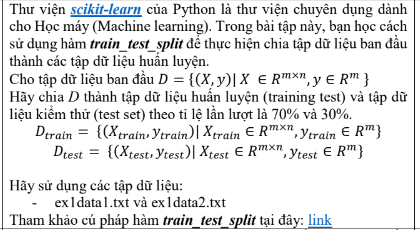

In [94]:
def readdata(folder, filename):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=',')
    D=preprocessing.MinMaxScaler().fit_transform(D)#fit du lieu bang minmax
    #D=preprocessing.StandardScaler().fit_transform(D)#fit du lieu bang StandardScaler()
    X, y = D[:,:-1], D[:,-1]
    X, y = scaleData(X, y)
    x0 = np.ones((X.shape[0], 1))
    X = np.column_stack([x0, X])
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=15)
    y_train = np.reshape(y_train, (y_train.shape[0], 1))
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    return X_train, X_test, y_train, y_test

In [95]:
def featureVectorScaling(data):
    data_scl = (data - np.mean(data))/(data.max() - data.min())
    return data_scl
def scaleData(X, y):
    X_scl = X[:, 0]
    for i in range(1, X.shape[1]):
        scl = featureVectorScaling(X[:, i])
        X_scl = np.column_stack([X_scl, scl])
    y_scl = featureVectorScaling(y)
    return X_scl, y_scl

In [96]:
def loss(w, X, y):
    m = y.shape[0]
    J = 0
    h = np.dot(X, w)
    J = (1/(2*m))*np.sum(np.square(h - y))
    return J

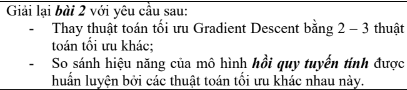

In [97]:
def gradientDescent(X, y, w, alpha, n):
    m = y.shape[0]
    J_history = []
    w_optimal = w.copy()
    for i in range(n):
        h = np.dot(X, w_optimal)
        error = h - y
        w_optimal = w_optimal - (alpha/m)*np.dot(X.T, error)
        J_history.append(computeLoss(X, y, w_optimal))
    return w_optimal, J_history


In [98]:
def scipy(X,y,w,n):
    result = optimize.minimize(fun=loss, x0=w, args=(X,y)
    ,method='L-BFGS-B',options={"maxiter":n} )
    w_optimal = result.x
    J_optimal = result.fun
    return w_optimal, J_optimal


In [99]:
def scipy2(X,y,w,n):
    result = optimize.minimize(fun=loss, x0=w, args=(X,y)
    ,method='Powell',options={"maxiter":n} )
    w_optimal2 = result.x
    J_optimal2 = result.fun
    return w_optimal2, J_optimal2

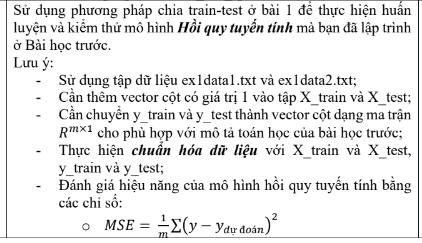

In [100]:
def mse(y, y_hat):
    m = y.shape[0]
    result = (1/m)*np.sum(np.square(y - y_hat))
    return result
def RMSE(y,y_hat):
  return math.sqrt(mse(y, y_hat))

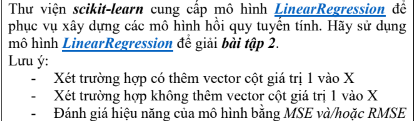

In [101]:
def skip(X,y):
  reg = LinearRegression().fit(X,y)
  reg0=reg.score(X, y)
  reg1= reg.coef_
  reg.intercept_
  reg2 =reg.predict(X)
  return reg0,reg1,reg2

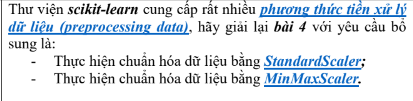

In [86]:
#def su_ly_du_lieu(X):
#  scaler=preprocessing.StandardScaler().fit_transform(X)
#  minmaxscaler = preprocessing.MinMaxScaler().fit_transform(X)
#  return scaler, minmaxscaler


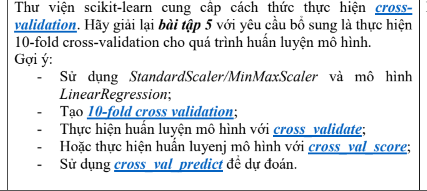

In [87]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import make_scorer
>>> from sklearn.metrics import confusion_matrix
>>> from sklearn.svm import LinearSVC

In [88]:
def k_fold(X,y):  
    kf = KFold(n_splits=10).get_n_splits(X)
    KFold(n_splits=2, random_state=None, shuffle=False)
    diabetes = datasets.load_diabetes()
    lasso = linear_model.Lasso()
    cv_results = cross_validate(lasso, X, y, cv=10)
    hh=cv_results['test_score']
    scores = cross_validate(lasso, X, y, cv=10,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    gg=scores['test_neg_mean_squared_error']
    print(scores['train_r2'])
    return hh,gg

In [89]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_score

In [90]:
def cross_valscore(X,y):
  diabetes = datasets.load_diabetes()
  lasso = linear_model.Lasso()
  ee=cross_val_score(lasso, X, y, cv=10)
  return ee

In [91]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_predict

In [92]:
def cross_valpredict(X,y):
  diabetes = datasets.load_diabetes()
  lasso = linear_model.Lasso()
  y_pred = cross_val_predict(lasso, X, y, cv=10)
  return y_pred

In [102]:
def main():
    n = 1500
    X_train, X_test, y_train, y_test = readdata("/content","ex1data1.txt")
    X_train, y_train = scaleData(X_train, y_train)
    X_test, y_test = scaleData(X_test, y_test)
    print('Huấn luyện mô hình trên tập dữ liệu train')
    w = np.zeros((X_train.shape[1], 1))
    #w, J_history = gradientDescent(X_train, y_train, w, alpha, n)
    w_optimal, J_optimal=scipy(X_test,y_test,w,n)
    print("trong so toi uu tu L-BFGS-B: ",w_optimal)
    print("ham mat mat la:",J_optimal)
    print(" . . . . .(^_^) . .   . .\n")

    w_optimal2, J_optimal2=scipy2(X_test,y_test,w,n)
    print("trong so toi uu tu Powell: ",w_optimal2)
    print("ham mat mat la:",J_optimal2)
    
    print(" . . . . .(^_^) . .   . .\n")
    print('Đánh giá mô hình trên tập dữ liệu test')
    y_hat = np.dot(X_test, w)
    print(" MSE: ", mse(y_test, y_hat))
    print(" . . . . .(^_^) . .   . .\n")
    phat=RMSE(y_test,y_hat)
    print("MSRE:",phat)

    reg0,reg1,reg2=skip(X_test,y_test)
    print("Trả về hệ số xác định của dự đoán",reg0)
    print("trong so toi uu",reg1)
    print("Dự đoán mô hình tuyến tính:",reg2)

    #scaler,minmaxscaler=su_ly_du_lieu(X_test)
    #print("sử lý dữ liệu bằng standscaler là :",scaler)
    #print("sử lý dữ liệu bằng minmaxscaler là :",minmaxscaler)

    hh,gg=k_fold(X_test,y_test)
    print("Thực hiện huấn luyện mô hình với cross_validate")
    print("Đánh giá một chỉ số:",hh)
    print("Đánh giá nhiều chỉ số",gg)

    ee=cross_valscore(X_test,y_test)
    print("thực hiện huấn luyenj mô hình với cross_val_score:",ee)

    y_pred=cross_valpredict(X_test,y_test)
    print("Sử dụng cross_val_predict để dự đoán.",y_pred)
if __name__ == '__main__':
    main()

Huấn luyện mô hình trên tập dữ liệu train
trong so toi uu tu L-BFGS-B:  [0. 0.]
ham mat mat la: 1.1921057752825788
 . . . . .(^_^) . .   . .

trong so toi uu tu Powell:  [-3.92408573e-10 -3.16392925e-11]
ham mat mat la: 1.1921057752825788
 . . . . .(^_^) . .   . .

Đánh giá mô hình trên tập dữ liệu test
 MSE:  0.07947371835217192
 . . . . .(^_^) . .   . .

MSRE: 0.28191083404539796
Trả về hệ số xác định của dự đoán 0.8495461076278321
trong so toi uu [[0.         0.82345462]]
Dự đoán mô hình tuyến tính: [[ 0.0564184 ]
 [-0.22188216]
 [-0.19322414]
 [-0.08565424]
 [ 0.26596666]
 [ 0.59871205]
 [-0.15448196]
 [-0.21753497]
 [-0.19317027]
 [-0.224484  ]
 [-0.11493174]
 [ 0.59488739]
 [-0.06091246]
 [-0.1476245 ]
 [ 0.01222473]
 [-0.15588792]
 [-0.22474257]
 [ 0.5235117 ]
 [-0.05027345]
 [-0.17370761]
 [-0.11977452]
 [-0.16362882]
 [ 0.52426586]
 [ 0.30604478]
 [ 0.04898455]
 [-0.21123237]
 [ 0.19442936]
 [-0.04407857]
 [-0.15413181]
 [-0.21408739]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Thực hiện